In [76]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False


import seaborn as sns
import missingno as msno
import squarify

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from sklearn.metrics import mean_squared_error

%matplotlib inline
plt.style.use('ggplot')

#### matplotlib kor problem

In [17]:
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())

버전:  3.0.0
설치 위치:  /Users/tax_k/anaconda3/envs/DL/lib/python3.6/site-packages/matplotlib/__init__.py
설정 위치:  /Users/tax_k/.matplotlib
캐시 위치:  /Users/tax_k/.matplotlib


In [18]:
print ('설정 파일 위치: ', mpl.matplotlib_fname())

설정 파일 위치:  /Users/tax_k/.matplotlib/matplotlibrc


In [49]:
font_location = '/Library/Fonts/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
print(font_name)
fm.FontProperties(fname=font_location)
mpl.rc('font', family=font_name)

# import numpy as np
# from matplotlib import rc, font_manager
# from matplotlib import pyplot as plt
# rc('font', family="NanumSquare")

# x, y = np.mgrid[0:140, 0:140]
# z = np.cos((x**2 + y**2) * 200)
# plt.title("한글 글꼴 테스트")
# plt.xlabel("한글 축제목 테스트")
# plt.ylabel("한글 축제목 테스트")
# plt.contourf(z)
# plt.show()

NanumGothic


In [50]:
# OSX의 설치된 폰트를 가져오는 함수
font_list_mac = fm.OSXFontDirectories
print((font_list_mac))

['/Library/Fonts/', '/Network/Library/Fonts/', '/System/Library/Fonts/', '/opt/local/share/fonts', '', '/Users/tax_k/Library/Fonts']


In [29]:
# path = '/Library/Fonts/NanumGothic.ttf'
# fontprop = fm.FontProperties(fname=path, size=18)

In [51]:
path = ''
state_ts = pd.read_csv(path+'merged_addr_gangnam.csv',parse_dates=['full_deal_date'])
print('Number of rows and columns in state ts:',state_ts.shape)

Number of rows and columns in state ts: (62555, 67)


In [52]:
## Data Description
def describe(df):
    print('======================================')
    print('No. of Rows.:{0}\nNo. of Columns:{1}\n'.format(df.shape[0], df.shape[1]))
    print('======================================')
    data_type = DataFrame(df.dtypes, columns=['Data Type'])
    null_count =  DataFrame(df.isnull().sum(), columns=['Null Count'])
    not_null_count = DataFrame(df.notnull().sum(), columns=['Not Null Count'])
    unique_count = DataFrame(df.nunique(), columns=['Unique Count'])
    joined = data_type.merge(null_count, left_index=True, right_index=True)
    joined = joined.merge(not_null_count, left_index=True, right_index=True)
    joined = joined.merge(unique_count, left_index=True, right_index=True)
    display(joined)
    display(df.describe())
    return None

In [53]:
state_ts.head()

,yard,price_per_yard,deal_price,build_y,deal_year,law_code,apt_name_x,deal_month,deal_day,area,...,IND_Oil,IND_ETC,IND_GAS,IND_GEO,IND_ELEC,CEN_Oil,CEN_Gas,CEN_Geo,City_LPG,City_Gas
0,24.463,0.345,8.450,2005,2006,역삼동,역삼래미안,1,1,80.870,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,24.463,0.307,7.500,2005,2006,역삼동,역삼래미안,1,1,80.870,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,17.968,0.284,5.100,2005,2006,역삼동,역삼래미안,1,1,59.400,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,18.008,0.278,5.000,2005,2006,역삼동,역삼래미안,1,1,59.530,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,24.463,0.307,7.500,2005,2006,역삼동,역삼래미안,1,1,80.870,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


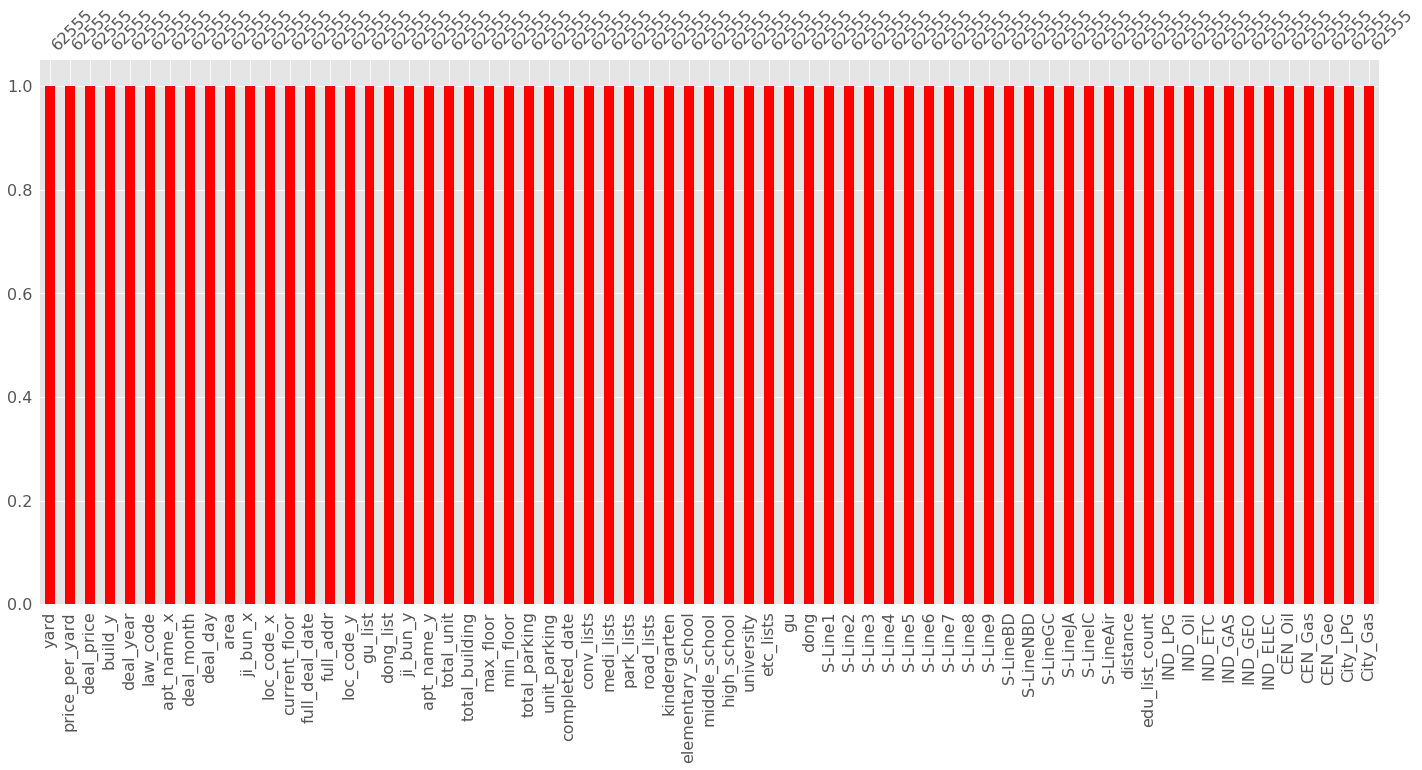

In [54]:
msno.bar(state_ts,color='r')

In [55]:
# Analysis
print('Date range:{} to {}'.format(state_ts['full_deal_date'].min(),state_ts['full_deal_date'].max()))
print('Number of States',state_ts['law_code'].nunique())

Date range:2006-01-01 00:00:00 to 2018-10-11 00:00:00
Number of States 13


In [56]:
state_month = state_ts.resample('M',on='full_deal_date').mean()
state_month = state_month.reset_index()
state_month.shape

(154, 59)

In [57]:
# Sample data by region name
state_vise = state_ts.groupby(['law_code']).mean()
state_vise.shape

(13, 58)

In [58]:
describe(state_ts)

No. of Rows.:62555
No. of Columns:67



,Data Type,Null Count,Not Null Count,Unique Count
yard,float64,0,62555,2067
price_per_yard,float64,0,62555,34079
deal_price,float64,0,62555,2888
build_y,int64,0,62555,43
deal_year,int64,0,62555,13
law_code,object,0,62555,13
apt_name_x,object,0,62555,564
deal_month,int64,0,62555,12
deal_day,int64,0,62555,3
area,float64,0,62555,2067


,yard,price_per_yard,deal_price,build_y,deal_year,deal_month,deal_day,area,loc_code_x,current_floor,...,IND_Oil,IND_ETC,IND_GAS,IND_GEO,IND_ELEC,CEN_Oil,CEN_Gas,CEN_Geo,City_LPG,City_Gas
count,62555.000,62555.000,62555.000,62555.000,62555.000,62555.000,62555.000,62555.000,62555.000,62555.000,...,62555.000,62555.000,62555.000,62555.000,62555.000,62555.000,62555.000,62555.000,62555.000,62555.000
mean,25.948,0.370,9.744,1994.406,2012.389,6.343,11.315,85.778,11680.000,8.604,...,0.000,0.000,0.360,0.006,0.000,0.000,0.053,0.039,0.000,0.015
std,12.642,0.133,6.311,10.146,3.820,3.428,8.137,41.793,0.000,6.629,...,0.000,0.000,0.480,0.075,0.000,0.000,0.224,0.194,0.000,0.122
min,3.660,0.010,0.100,1974.000,2006.000,1.000,1.000,12.100,11680.000,-1.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,16.580,0.277,5.500,1984.000,2009.000,3.000,1.000,54.810,11680.000,4.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,25.516,0.355,8.250,1994.000,2013.000,6.000,11.000,84.349,11680.000,7.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,33.133,0.445,12.500,2004.000,2016.000,9.000,21.000,109.530,11680.000,12.000,...,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
max,128.357,1.447,64.000,2017.000,2018.000,12.000,21.000,424.320,11680.000,68.000,...,0.000,0.000,1.000,1.000,0.000,0.000,1.000,1.000,0.000,1.000


In [59]:
state_ts.describe()

,yard,price_per_yard,deal_price,build_y,deal_year,deal_month,deal_day,area,loc_code_x,current_floor,...,IND_Oil,IND_ETC,IND_GAS,IND_GEO,IND_ELEC,CEN_Oil,CEN_Gas,CEN_Geo,City_LPG,City_Gas
count,62555.000,62555.000,62555.000,62555.000,62555.000,62555.000,62555.000,62555.000,62555.000,62555.000,...,62555.000,62555.000,62555.000,62555.000,62555.000,62555.000,62555.000,62555.000,62555.000,62555.000
mean,25.948,0.370,9.744,1994.406,2012.389,6.343,11.315,85.778,11680.000,8.604,...,0.000,0.000,0.360,0.006,0.000,0.000,0.053,0.039,0.000,0.015
std,12.642,0.133,6.311,10.146,3.820,3.428,8.137,41.793,0.000,6.629,...,0.000,0.000,0.480,0.075,0.000,0.000,0.224,0.194,0.000,0.122
min,3.660,0.010,0.100,1974.000,2006.000,1.000,1.000,12.100,11680.000,-1.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,16.580,0.277,5.500,1984.000,2009.000,3.000,1.000,54.810,11680.000,4.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,25.516,0.355,8.250,1994.000,2013.000,6.000,11.000,84.349,11680.000,7.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,33.133,0.445,12.500,2004.000,2016.000,9.000,21.000,109.530,11680.000,12.000,...,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
max,128.357,1.447,64.000,2017.000,2018.000,12.000,21.000,424.320,11680.000,68.000,...,0.000,0.000,1.000,1.000,0.000,0.000,1.000,1.000,0.000,1.000


In [60]:
state_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62555 entries, 0 to 62554
Data columns (total 67 columns):
yard                 62555 non-null float64
price_per_yard       62555 non-null float64
deal_price           62555 non-null float64
build_y              62555 non-null int64
deal_year            62555 non-null int64
law_code             62555 non-null object
apt_name_x           62555 non-null object
deal_month           62555 non-null int64
deal_day             62555 non-null int64
area                 62555 non-null float64
ji_bun_x             62555 non-null object
loc_code_x           62555 non-null int64
current_floor        62555 non-null int64
full_deal_date       62555 non-null datetime64[ns]
full_addr            62555 non-null object
loc_code_y           62555 non-null int64
gu_list              62555 non-null object
dong_list            62555 non-null object
ji_bun_y             62555 non-null object
apt_name_y           62555 non-null object
total_unit           62555

In [61]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [116]:
state_ts.describe()

,yard,price_per_yard,deal_price,build_y,deal_year,deal_month,deal_day,area,loc_code_x,current_floor,...,IND_GAS,IND_GEO,IND_ELEC,CEN_Oil,CEN_Gas,CEN_Geo,City_LPG,City_Gas,Year,Month
count,62555.000,62555.000,62555.000,62555.000,62555.000,62555.000,62555.000,62555.000,62555.000,62555.000,...,62555.000,62555.000,62555.000,62555.000,62555.000,62555.000,62555.000,62555.000,62555.000,62555.000
mean,25.948,0.370,9.744,1994.406,2012.389,6.343,11.315,85.778,11680.000,8.604,...,0.360,0.006,0.000,0.000,0.053,0.039,0.000,0.015,2012.389,6.343
std,12.642,0.133,6.311,10.146,3.820,3.428,8.137,41.793,0.000,6.629,...,0.480,0.075,0.000,0.000,0.224,0.194,0.000,0.122,3.820,3.428
min,3.660,0.010,0.100,1974.000,2006.000,1.000,1.000,12.100,11680.000,-1.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2006.000,1.000
25%,16.580,0.277,5.500,1984.000,2009.000,3.000,1.000,54.810,11680.000,4.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2009.000,3.000
50%,25.516,0.355,8.250,1994.000,2013.000,6.000,11.000,84.349,11680.000,7.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2013.000,6.000
75%,33.133,0.445,12.500,2004.000,2016.000,9.000,21.000,109.530,11680.000,12.000,...,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2016.000,9.000
max,128.357,1.447,64.000,2017.000,2018.000,12.000,21.000,424.320,11680.000,68.000,...,1.000,1.000,0.000,0.000,1.000,1.000,0.000,1.000,2018.000,12.000


In [147]:
state_ts.loc[:, 'nml_bldg_age'] = state_ts['deal_year'] - state_ts['build_y']

### 1000만원? 64억??

In [148]:
state_ts.sort_values(["price_per_yard"], ascending=[False]).head(10)

,yard,price_per_yard,deal_price,build_y,deal_year,law_code,apt_name_x,deal_month,deal_day,area,...,CEN_Oil,CEN_Gas,CEN_Geo,City_LPG,City_Gas,Date,Year,Month,Day,nml_bldg_age
4238,10.851,1.447,15.700,1982,2018,개포동,개포주공 4단지,8,21,35.870,...,0.000,0.000,0.000,0.000,0.000,2018-08-21,2018,8,21,36
4237,15.243,1.246,19.000,1982,2018,개포동,개포주공 4단지,8,21,50.390,...,0.000,0.000,0.000,0.000,0.000,2018-08-21,2018,8,21,36
4236,15.243,1.243,18.950,1982,2018,개포동,개포주공 4단지,8,1,50.390,...,0.000,0.000,0.000,0.000,0.000,2018-08-01,2018,8,1,36
4234,12.702,1.181,15.000,1982,2018,개포동,개포주공 4단지,7,11,41.990,...,0.000,0.000,0.000,0.000,0.000,2018-07-11,2018,7,11,36
4233,12.871,1.165,15.000,1982,2018,개포동,개포주공 4단지,3,21,42.550,...,0.000,0.000,0.000,0.000,0.000,2018-03-21,2018,3,21,36
4235,12.702,1.142,14.500,1982,2018,개포동,개포주공 4단지,7,21,41.990,...,0.000,0.000,0.000,0.000,0.000,2018-07-21,2018,7,21,36
60405,15.010,1.119,16.800,2011,2018,청담동,청담자이,8,21,49.619,...,0.000,0.000,0.000,0.000,0.000,2018-08-21,2018,8,21,7
60404,15.010,1.119,16.800,2011,2018,청담동,청담자이,8,1,49.619,...,0.000,0.000,0.000,0.000,0.000,2018-08-01,2018,8,1,7
60407,15.002,1.097,16.450,2011,2018,청담동,청담자이,9,11,49.593,...,0.000,0.000,0.000,0.000,0.000,2018-09-11,2018,9,11,7
62166,18.147,1.075,19.500,2015,2018,대치동,래미안대치팰리스,8,21,59.990,...,0.000,0.000,0.000,0.000,0.000,2018-08-21,2018,8,21,3


In [149]:
state_ts.sort_values(["deal_price"], ascending=[False]).head(10)

,yard,price_per_yard,deal_price,build_y,deal_year,law_code,apt_name_x,deal_month,deal_day,area,...,CEN_Oil,CEN_Gas,CEN_Geo,City_LPG,City_Gas,Date,Year,Month,Day,nml_bldg_age
59146,74.106,0.864,64.000,2003,2018,청담동,상지카일룸,6,21,244.980,...,0.000,0.000,0.000,0.000,0.000,2018-06-21,2018,6,21,15
52427,59.105,1.049,62.000,2004,2018,삼성동,아이파크,8,11,195.388,...,0.000,0.000,0.000,0.000,0.000,2018-08-11,2018,8,11,14
52430,59.105,1.015,60.000,2004,2018,삼성동,아이파크,9,11,195.388,...,0.000,0.000,0.000,0.000,0.000,2018-09-11,2018,9,11,14
59414,73.907,0.798,59.000,2006,2018,청담동,상지리츠빌카일룸2차,6,11,244.320,...,0.000,0.000,0.000,0.000,0.000,2018-06-11,2018,6,11,12
59412,73.907,0.792,58.500,2006,2018,청담동,상지리츠빌카일룸2차,2,11,244.320,...,0.000,0.000,0.000,0.000,0.000,2018-02-11,2018,2,11,12
59409,73.907,0.771,57.000,2006,2014,청담동,상지리츠빌카일룸2차,3,21,244.320,...,0.000,0.000,0.000,0.000,0.000,2014-03-21,2014,3,21,8
59411,73.907,0.771,57.000,2006,2017,청담동,상지리츠빌카일룸2차,12,21,244.320,...,0.000,0.000,0.000,0.000,0.000,2017-12-21,2017,12,21,11
52241,59.105,0.964,57.000,2004,2008,삼성동,아이파크,4,11,195.388,...,0.000,0.000,0.000,0.000,0.000,2008-04-11,2008,4,11,4
52264,59.105,0.953,56.300,2004,2009,삼성동,아이파크,12,21,195.388,...,0.000,0.000,0.000,0.000,0.000,2009-12-21,2009,12,21,5
59413,73.907,0.744,55.000,2006,2018,청담동,상지리츠빌카일룸2차,3,1,244.320,...,0.000,0.000,0.000,0.000,0.000,2018-03-01,2018,3,1,12


In [150]:
state_ts.sort_values(["deal_price"], ascending=[False]).tail(10)

,yard,price_per_yard,deal_price,build_y,deal_year,law_code,apt_name_x,deal_month,deal_day,area,...,CEN_Oil,CEN_Gas,CEN_Geo,City_LPG,City_Gas,Date,Year,Month,Day,nml_bldg_age
4753,12.260,0.057,0.700,1984,2011,개포동,시영,3,21,40.530,...,0.000,0.000,0.000,0.000,0.000,2011-03-21,2011,3,21,27
47130,10.828,0.061,0.665,2003,2011,대치동,대우아이빌멤버스(891-26),5,21,35.796,...,0.000,0.000,0.000,0.000,0.000,2011-05-21,2011,5,21,8
53462,9.214,0.065,0.600,2003,2011,대치동,아름빌(889-74),6,1,30.460,...,0.000,0.000,0.000,0.000,0.000,2011-06-01,2011,6,1,8
27802,10.978,0.046,0.500,2004,2009,논현동,마일스디오빌,8,11,36.290,...,0.000,0.000,0.000,0.000,0.000,2009-08-11,2009,8,11,5
4788,8.709,0.057,0.500,1984,2011,개포동,시영,11,1,28.790,...,0.000,0.000,0.000,0.000,0.000,2011-11-01,2011,11,1,27
52123,34.246,0.015,0.500,2006,2011,청담동,청담2차e-편한세상,11,21,113.210,...,0.000,0.000,0.000,0.000,0.000,2011-11-21,2011,11,21,5
18090,23.172,0.017,0.400,1990,2007,대치동,선경3차,4,21,76.600,...,0.000,0.000,0.000,0.000,0.000,2007-04-21,2007,4,21,17
53942,19.702,0.020,0.400,2003,2006,신사동,한양,8,21,65.130,...,0.000,0.000,0.000,0.000,0.000,2006-08-21,2006,8,21,3
56017,25.673,0.012,0.300,2003,2009,신사동,압구정화이트빌,9,1,84.870,...,0.000,0.000,0.000,0.000,0.000,2009-09-01,2009,9,1,6
37776,10.418,0.010,0.100,1993,2011,수서동,까치마을,5,11,34.440,...,0.000,0.000,0.000,0.000,0.000,2011-05-11,2011,5,11,18


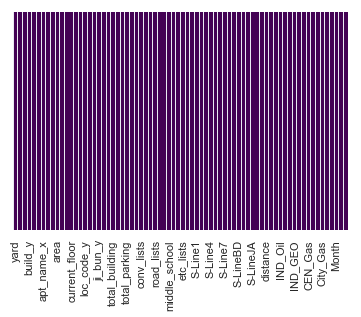

In [151]:
sns.heatmap(state_ts.isnull(), yticklabels= False, cbar=False, cmap= 'viridis')

In [152]:
state_ts.isnull().values.any()

False

In [154]:
state_ts['nml_bldg_age'].value_counts()

14    2476
11    2401
10    2328
9     2241
23    2157
12    2142
8     2072
4     2012
13    1934
7     1924
5     1922
22    1792
15    1791
30    1767
3     1761
24    1744
25    1735
6     1734
17    1656
32    1621
31    1618
33    1586
26    1559
16    1529
27    1452
21    1408
18    1376
29    1346
19    1306
34    1303
28    1214
2     1211
20    1111
1      989
35     975
38     688
37     665
36     654
0      482
39     403
40     247
41     175
42      43
43       4
44       1
Name: nml_bldg_age, dtype: int64

In [153]:
state_ts['law_code'].value_counts()

개포동     11486
대치동     10446
도곡동      8387
역삼동      7113
삼성동      5306
압구정동     4731
수서동      3743
청담동      3470
일원동      3425
논현동      2841
세곡동       738
신사동       715
자곡동       154
Name: law_code, dtype: int64

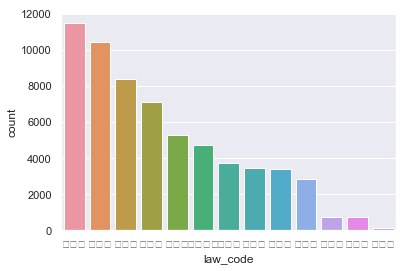

In [155]:
sns.countplot(state_ts.law_code, order = state_ts['law_code'].value_counts().index)

No handles with labels found to put in legend.
/Users/tax_k/anaconda3/envs/DL/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



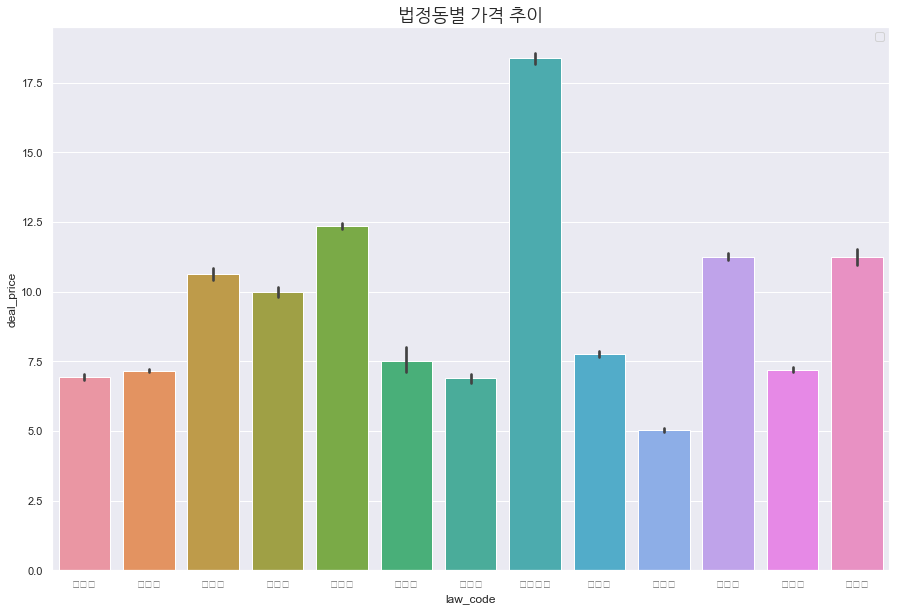

In [156]:
fig,axes = plt.subplots(nrows=1,ncols=1, figsize=(15,10))
plt.title('법정동별 가격 추이', fontproperties=fontprop)
plt.xlabel('dong')
plt.ylabel('House Prices')
plt.legend()
sns.barplot(x='law_code', y='deal_price', data = state_ts)

In [157]:
statelist = state_ts['law_code'].unique()

In [158]:
statelist = list(statelist)
print(len(statelist))

13


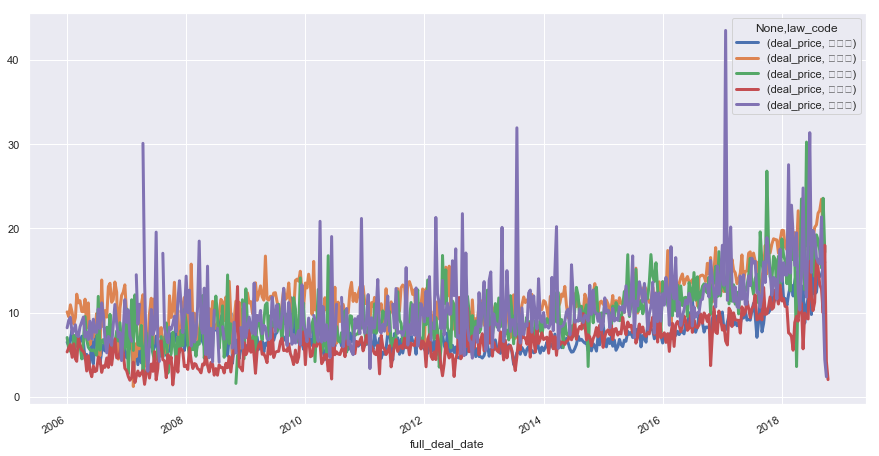

In [159]:
stateseries = pd.DataFrame(state_ts[(state_ts['law_code'].\
    isin(statelist[:5]))][['full_deal_date','law_code','deal_price']].\
    dropna().\
    groupby(['full_deal_date', 'law_code'])['law_code','deal_price'].mean().unstack())
stateseries.plot(figsize=(15,8), linewidth=3)
plt.show()

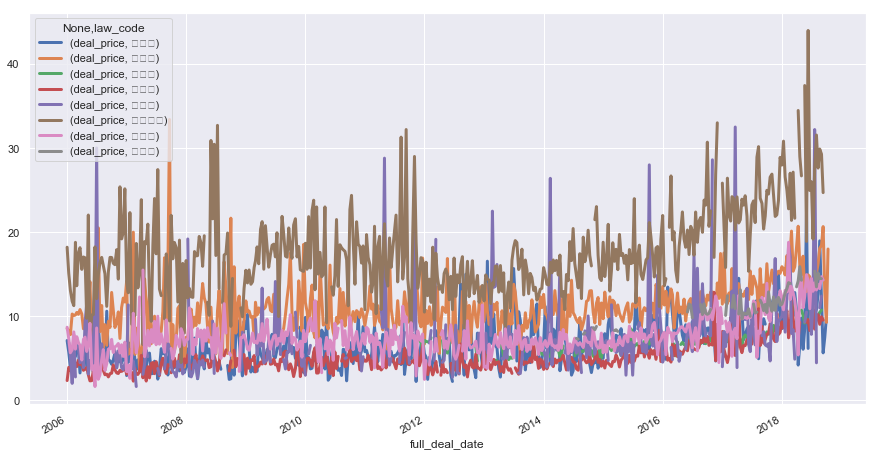

In [160]:
stateseries = pd.DataFrame(state_ts[(state_ts['law_code'].\
    isin(statelist[5:]))][['full_deal_date','law_code','deal_price']].\
    dropna().\
    groupby(['full_deal_date', 'law_code'])['law_code','deal_price'].mean().unstack())
stateseries.plot(figsize=(15,8), linewidth=3)
plt.show()

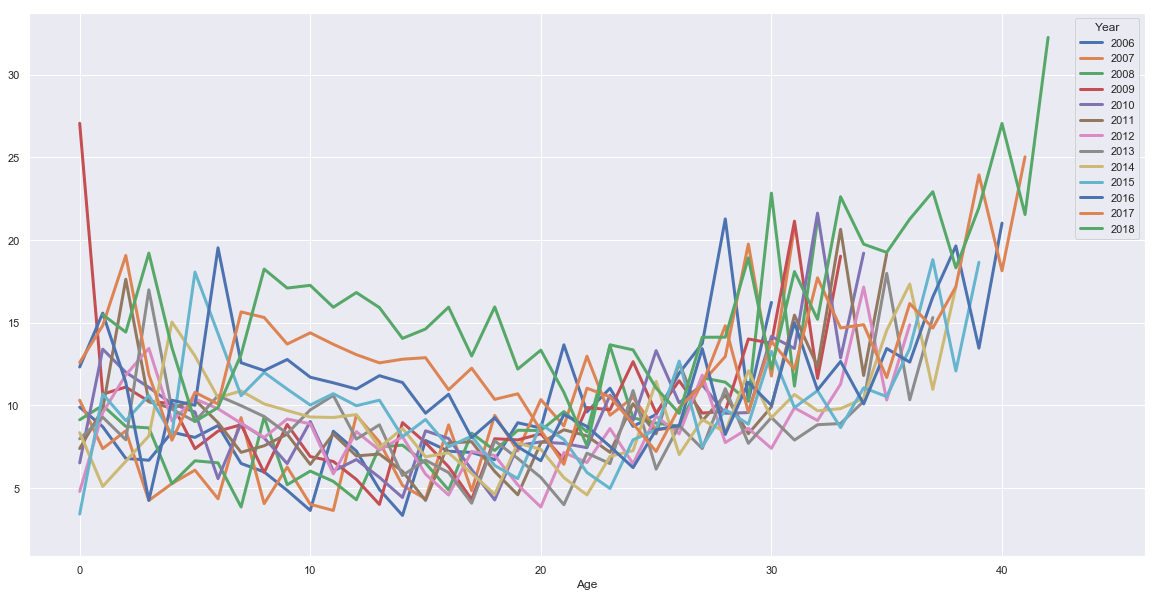

In [165]:
%matplotlib inline
sns.set()
season = state_ts
season['Date'] = state_ts.full_deal_date
season['Year'] = state_ts['full_deal_date'].dt.year
season['Month'] = state_ts['full_deal_date'].dt.month
season['Day'] = state_ts['full_deal_date'].dt.day
season['Age'] = state_ts['nml_bldg_age']
spivot = pd.pivot_table(season, index='Age', columns = 'Year', values = 'deal_price', aggfunc=np.mean)
spivot.plot(figsize=(20,10), linewidth=3)
plt.show()

In [ ]:
# brtypes = state_ts.groupby('full_deal_date')['full_deal_date','MedianListingPricePerSqft_1Bedroom', 'MedianListingPricePerSqft_2Bedroom','MedianListingPricePerSqft_3Bedroom','MedianListingPricePerSqft_4Bedroom','MedianListingPricePerSqft_5BedroomOrMore'].\
#     mean().dropna()
# pd.plotting.autocorrelation_plot(brtypes);
# plt.show()

In [162]:
state_ts.corr()

,yard,price_per_yard,deal_price,build_y,deal_year,deal_month,deal_day,area,loc_code_x,current_floor,...,IND_ELEC,CEN_Oil,CEN_Gas,CEN_Geo,City_LPG,City_Gas,Year,Month,Day,nml_bldg_age
yard,1.000,0.086,0.813,-0.029,0.113,0.006,0.008,1.000,nan,0.131,...,nan,nan,0.140,-0.052,nan,0.016,0.113,0.006,0.008,0.069
price_per_yard,0.086,1.000,0.576,-0.264,0.399,0.033,0.013,0.086,nan,0.073,...,nan,nan,0.114,0.068,nan,-0.007,0.399,0.033,0.013,0.400
deal_price,0.813,0.576,1.000,-0.155,0.264,0.023,0.013,0.813,nan,0.196,...,nan,nan,0.167,-0.012,nan,0.005,0.264,0.023,0.013,0.246
build_y,-0.029,-0.264,-0.155,1.000,0.092,0.030,-0.002,-0.029,nan,0.249,...,nan,nan,-0.216,-0.229,nan,-0.091,0.092,0.030,-0.002,-0.932
deal_year,0.113,0.399,0.264,0.092,1.000,-0.025,0.003,0.113,nan,0.039,...,nan,nan,0.012,-0.013,nan,-0.009,1.000,-0.025,0.003,0.275
deal_month,0.006,0.033,0.023,0.030,-0.025,1.000,0.005,0.006,nan,-0.005,...,nan,nan,-0.011,-0.003,nan,-0.005,-0.025,1.000,0.005,-0.038
deal_day,0.008,0.013,0.013,-0.002,0.003,0.005,1.000,0.008,nan,-0.005,...,nan,nan,0.007,0.002,nan,0.001,0.003,0.005,1.000,0.003
area,1.000,0.086,0.813,-0.029,0.113,0.006,0.008,1.000,nan,0.131,...,nan,nan,0.140,-0.052,nan,0.016,0.113,0.006,0.008,0.069
loc_code_x,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
current_floor,0.131,0.073,0.196,0.249,0.039,-0.005,-0.005,0.131,nan,1.000,...,nan,nan,0.012,-0.030,nan,-0.020,0.039,-0.005,-0.005,-0.226


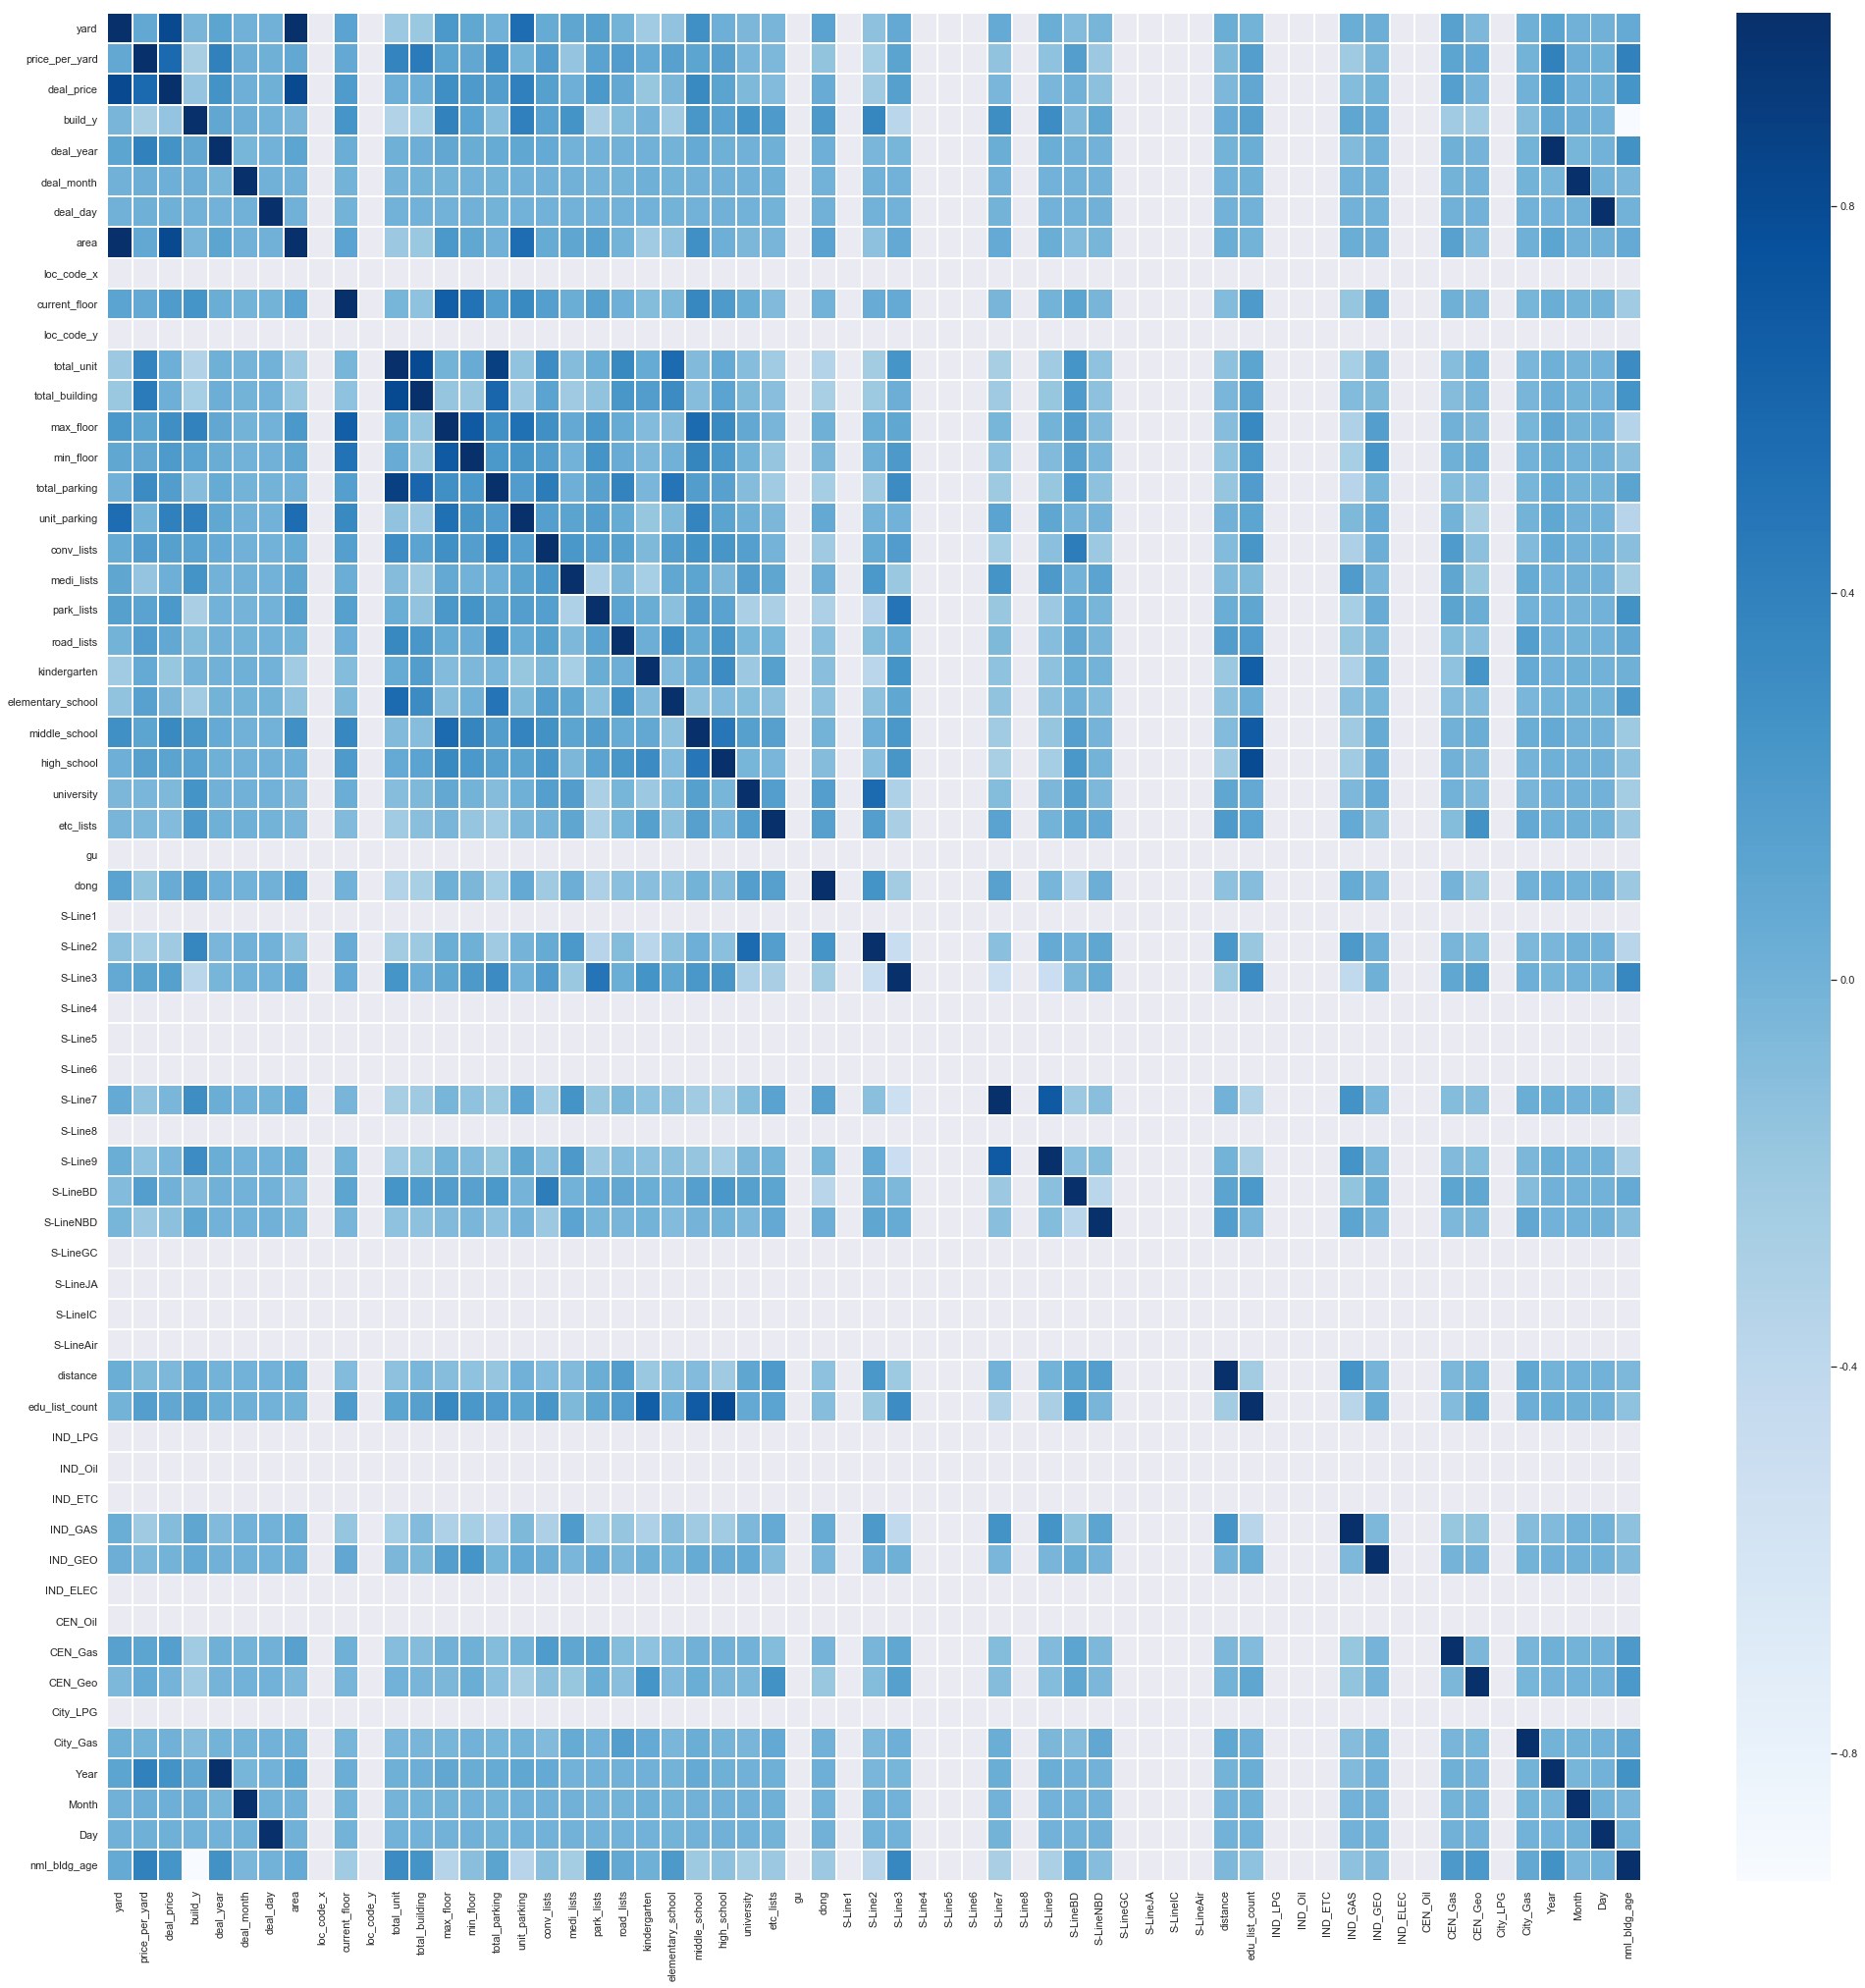

In [163]:
plt.figure(figsize=(35, 35))
sns.heatmap(data=state_ts.corr(), annot=False, fmt='.2f', linewidths='1', cmap='Blues')